### Inverse Quantum Fourier Transform
#### Given N-qubit IQFT circuit, find probability of getting the right bit string for all 2 ** N input states

In [1]:
from Circuit import Circuit
from Circuit_ops import zero_state, apply, state_prob_plot
from Circuit_ops import int_to_bit_str, bit_str_to_int
import time
from numpy import *
import matplotlib.pyplot as plt

In [2]:
# Build IQFT circuit with native gates
def iqft(N):
    circ = Circuit(N)
    for i in range(N):
        circ.Y(i, pi/2)
        circ.X(i, pi)

    for i in range(0, N - 1):

        # Y -pi/2 gate
        circ.Y(i, pi / 2)

        # XX gates
        for j in range(1, i + 2):
            theta = pi / 2 ** (j + 1)

            circ.X(i + 1, -theta)
            circ.X(i + 1 - j, -theta)

            circ.XX(i + 1, i + 1 - j, theta)

    for i in range(N - 1):
        circ.Y(i, -pi/2)
    return circ
    
# 2 ** N different initial product states
def iqft_init_states():
    x = arange(2 ** N, dtype=complex)
    states = exp(2 * pi * 1j * outer(x, x) / 2 ** N) / 2 ** (N / 2)
    return states

# Bit string readout (reversed)
def reversed_readout(state, N):
    # Find readout with largest probability
    readout = argmax(abs(state)) 
    readout = int_to_bit_str(readout, N)
    readout = flip(readout)
    readout = bit_str_to_int(readout)
    return readout

State probabilities for 10-qubit IQFT

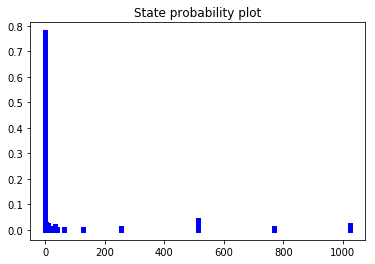

Readout = 0


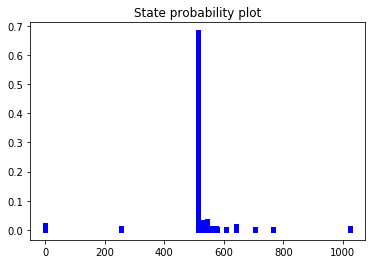

Readout = 1


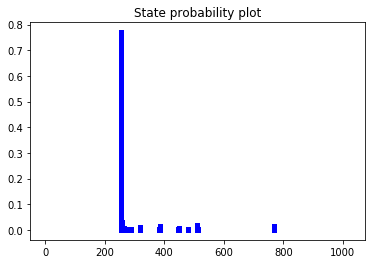

Readout = 2


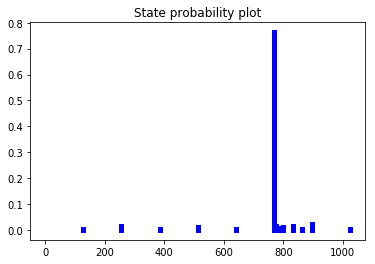

Readout = 3


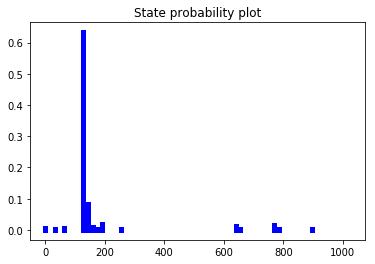

Readout = 4


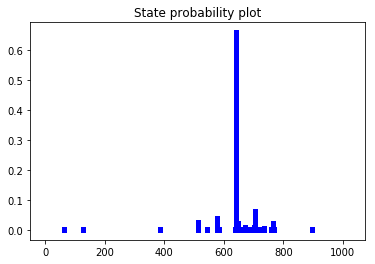

Readout = 5


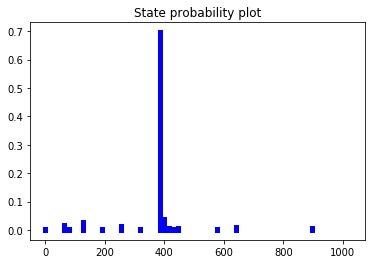

Readout = 6


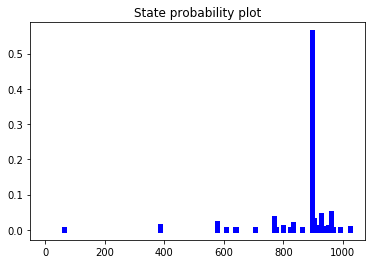

Readout = 7


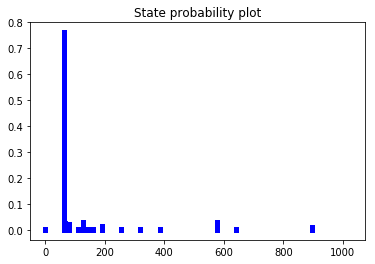

Readout = 8


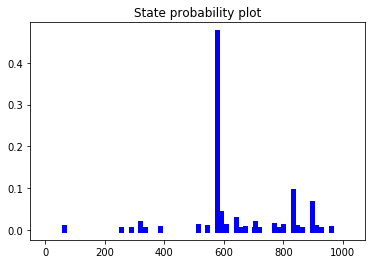

Readout = 9


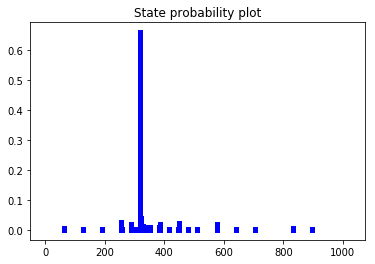

Readout = 10


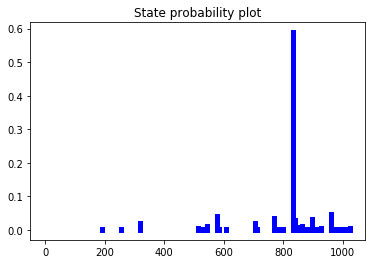

Readout = 11


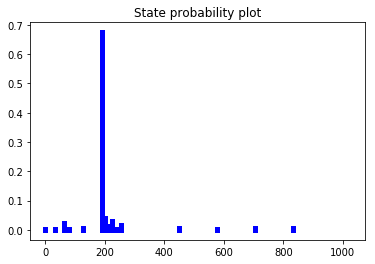

Readout = 12


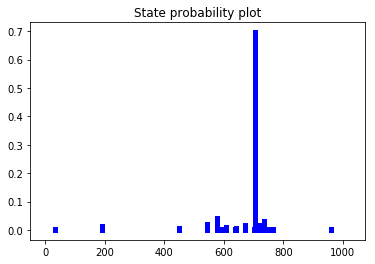

Readout = 13


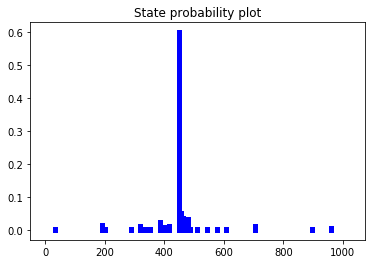

Readout = 14


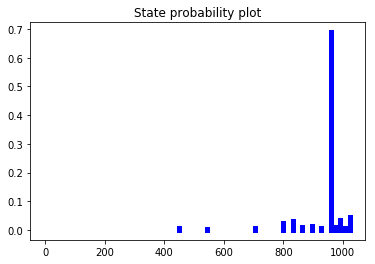

Readout = 15


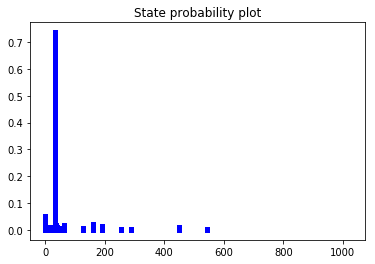

Readout = 16


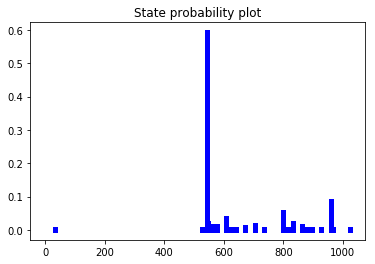

Readout = 17


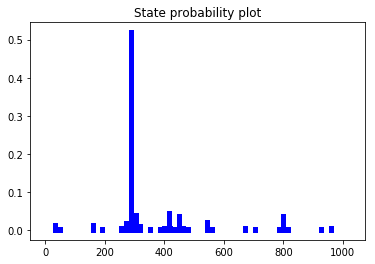

Readout = 18


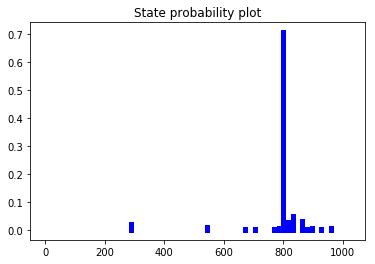

Readout = 19


In [3]:
# 
# 
N = 10

circ = iqft(N)
circ.init_state = iqft_init_states()
circ.errors = [0.2] * 3
final_states = circ.compute(mode="mulitple-init-states")

# Plot state probabilities for many input states (up to 20)
num_of_plots = 2 ** N if 2 ** N < 20 else 20
for i in range(num_of_plots):
    state = final_states[i]
    state_prob_plot(state)
    
    readout = reversed_readout(state, N)
    print(f"Readout = {readout}")

How often does IQFT go wrong for 12 qubits?

In [4]:
N = 12

circ = iqft(N)
circ.init_state = iqft_init_states()
circ.errors = [0.2] * 3

start = time.time()
final_states = circ.compute(mode="mulitple-init-states")
print(f"Time elapsed = {time.time() - start}s")

def check_iqft_output():
    # err_count is the cumulative number of bad readouts (correct readout does NOT have highest probability)
    err_count = 0
    for i in range(2 ** N):
        readout = reversed_readout(final_states[i], N)
        
        if readout != i:
            err_count += 1
        
    return err_count

print(f"Incorrect readouts = {check_iqft_output()}")

# 12-qubit result
# errors = [0.2, 0.2, 0.2]
# Time elapsed = 254.91857194900513s
# Zero failures

Time elapsed = 244.79044771194458s
Incorrect readouts = 0


IQFT doesn't fail for 10% - 20% over-rotation and phase errors! Let's find out how high the readout contrast is

In [10]:
# Define "readout contrast" to be ratio between highest readout probability and second highest
def readout_contrast(states, num):
    print("Ratio between highest and 2nd highest state probabilities:")
    
    ratios = []
    for i in range(num):
        probs = abs(states[i]) ** 2
        probs = sorted(probs, reverse=True)
        ratio = probs[0] / probs[1]
        print(ratio)
        ratios.append(ratio)
    
    ratios.sort()
    print (f"Lowest five ratios = {ratios[:5]}")
            
num = 2 ** N if 2 ** N < 100 else 100
readout_contrast(final_states, num)

Ratio between highest and 2nd highest state probabilities:
12.56883399726364
8.311141150739827
14.204507005643533
11.910567349772148
13.256336096725803
7.630510523126696
10.647392459250394
9.813681852518188
12.871064815509673
13.3976691958587
17.789428460034557
9.549199477002851
19.082063235662222
7.468474180348953
5.906900425865451
11.399986462262536
12.35401841810709
19.177928331494165
9.484210350069688
14.391652834931808
12.444996937787518
7.964898572812987
12.861517738532276
14.69299793979226
6.989300046094563
7.779650139773048
19.803067703969084
18.15958699762656
9.091744555165983
15.529803255077017
11.877743701170944
10.434681187583097
20.8592521769641
18.756431233124257
19.242206875369533
19.51659778135209
12.832476992598846
12.042960385873627
38.792712150939316
9.565294549875762
22.892781603911835
10.646477295981454
17.27815839990739
15.94938099939112
4.115703206072815
11.495263010355007
28.17607634114703
14.19183691333197
11.486377847209692
14.918202161157868
16.44350678402206

In [ ]:
# JUNK

# swapaxes(outer(a, b), 0, 1)
#     x = binary_repr(x, width=N)
#     x = array(list(map(int, x)))
    
#     for i in range(N):
#         phase = 0
        
#         for j in range(i + 1):
#             phase += x[N - 1 - i + j] * 2 ** (N - 1 - j)
#         phases[i] = phase
        
#     for k in range(2 ** N):
#         k_bin = binary_repr(k, width=N)
#         k_bin = array(list(map(int, k_bin)))
        
#         state[k] = exp(1j * (dot(phases, k_bin)) * 2 * pi / (2 ** N)) / 2 ** (N / 2)